[View in Colaboratory](https://colab.research.google.com/github/hanshika0292/EIP-Assignments/blob/master/HANSHIKA_BATCH_4_ASSIGNMENT4A.ipynb)

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 6s 1us/step


(60000, 28, 28)


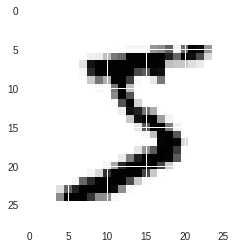

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 1, 7, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 7, 1, activation='relu'))
model.add(Convolution2D(32, 1, 7, activation='relu'))
model.add(Convolution2D(32, 7, 1, activation='relu'))
model.add(Convolution2D(32, 1, 7, activation='relu'))
model.add(Convolution2D(32, 7, 1, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 7), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 7), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 7), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call 

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 22, 32)        256       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 22, 22, 32)        7200      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 22, 16, 32)        7200      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 32)        7200      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 10, 32)        7200      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 10, 10, 32)        7200      
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 10, 10, 10)        330       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [42]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 30s 498us/step - loss: 0.1875 - acc: 0.9424
Epoch 2/10
33152/60000 [===============>..............] - ETA: 13s - loss: 0.0670 - acc: 0.9802

60000/60000 [==============================] - 30s 494us/step - loss: 0.0615 - acc: 0.9818
Epoch 3/10
52864/60000 [=========================>....] - ETA: 3s - loss: 0.0485 - acc: 0.9852

60000/60000 [==============================] - 30s 498us/step - loss: 0.0492 - acc: 0.9850
Epoch 4/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.0405 - acc: 0.9870

60000/60000 [==============================] - 30s 505us/step - loss: 0.0405 - acc: 0.9870
Epoch 5/10
60000/60000 [==============================] - 31s 517us/step - loss: 0.0338 - acc: 0.9894
Epoch 6/10
   32/60000 [..............................] - ETA: 37s - loss: 0.0073 - acc: 1.0000

60000/60000 [==============================] - 31s 524us/step - loss: 0.0313 - acc: 0.9901
Epoch 7/10
30304/60000 [==============>...............] - ETA: 15s - loss: 0.0239 - acc: 0.9924

60000/60000 [==============================] - 32s 534us/step - loss: 0.0258 - acc: 0.9920
Epoch 8/10
42528/60000 [====================>.........] - ETA: 9s - loss: 0.0231 - acc: 0.9928

60000/60000 [==============================] - 32s 533us/step - loss: 0.0236 - acc: 0.9925
Epoch 9/10
46656/60000 [======================>.......] - ETA: 7s - loss: 0.0211 - acc: 0.9932

60000/60000 [==============================] - 32s 535us/step - loss: 0.0217 - acc: 0.9930
Epoch 10/10
59232/60000 [============================>.] - ETA: 0s - loss: 0.0190 - acc: 0.9938

60000/60000 [==============================] - 30s 492us/step - loss: 0.0188 - acc: 0.9938


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [44]:
print(score)

[0.034621530023282686, 0.99]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[9.0003614e-16 1.1568113e-16 4.3203499e-08 1.5926430e-07 7.0616558e-18
  6.2241540e-15 3.3579497e-29 9.9999976e-01 2.3438437e-13 3.9254338e-08]
 [2.4079378e-19 5.8906113e-14 1.0000000e+00 9.5695273e-21 1.8668557e-31
  1.9608224e-20 1.4572021e-15 5.8621119e-28 2.6419429e-17 5.0164921e-32]
 [1.3508744e-14 9.9998367e-01 2.7797695e-08 2.5973645e-11 4.3499955e-09
  1.7431134e-07 2.2539948e-09 6.1072285e-09 1.6061178e-05 2.0756478e-11]
 [9.9999905e-01 3.5440012e-18 4.7891504e-09 1.2348141e-13 2.0936079e-11
  1.0737985e-11 9.7898169e-07 9.0368624e-15 3.8179299e-13 1.4760535e-09]
 [2.6650039e-15 8.9998448e-17 3.7741782e-14 2.5740077e-17 1.0000000e+00
  9.8741356e-19 3.3665955e-14 4.2733385e-17 8.0434486e-15 6.6977209e-12]
 [1.0137029e-16 9.9999952e-01 4.1778110e-09 1.8000362e-14 3.9781090e-09
  9.5344360e-13 6.8753982e-11 6.1833720e-09 4.5806715e-07 2.6400895e-12]
 [4.4687639e-23 5.7374873e-13 9.7710876e-12 3.5513558e-16 9.9999976e-01
  8.5818253e-15 1.8532664e-17 2.0913313e-14 2.6923686e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored